In [1314]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1315]:
data = pd.read_csv("titanic/train.csv")

In [1316]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1317]:
lg = LogisticRegression(random_state=42)

In [1318]:
# data.dropna(inplace=True)

In [1319]:
data.shape

(891, 12)

In [1320]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1321]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1322]:
data['Cabin'].isna().sum()

np.int64(687)

In [1323]:
data_cleaned = data.dropna(subset=['Age', 'Fare'])

In [1324]:
data_cleaned.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [1325]:
data_cleaned['Pclass'].unique()

array([3, 1, 2])

In [1326]:
data_cleaned['SibSp'].unique()

array([1, 0, 3, 4, 2, 5])

In [1327]:
data_cleaned['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1328]:
def get_title(name):
    if "Master" in name:
        return "Master"
    elif "Mr" in name:
        return "Mr"
    elif "Mrs" in name:
        return "Mrs"
    elif "Miss" in name:
        return "Miss"
    else:
        return "NA"

In [ ]:
def create_features(df):
    sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
    pclass_encoded = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
    embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)

    df = pd.concat([df, sex_encoded, pclass_encoded, embarked_encoded], axis=1)

    # Normalize Fare using StandardScaler
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()
    df['Fare'] = scaler.fit_transform(df[['Fare']])
    df['Age'] = scaler.fit_transform(df[['Age']])
    df['FamiliySize'] = df['SibSp'] + df['Parch'] + 1
    df['FarePerPerson'] = df['Fare'] / df['FamiliySize']
    df["Title"] = df["Name"].apply(get_title)
    title_encoded = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)
    df = pd.concat([df, title_encoded], axis=1)
    df["IsAlone"] = (df["FamiliySize"] == 1).astype(int)

    # features = ['Sex_male', 'Age', 'FamiliySize', 'Pclass_3', 'FarePerPerson'] + \
    #     list(title_encoded.columns) + list(embarked_encoded.columns) + \
    #         list(pclass_encoded.columns)

    features = ['Sex_male', 'Pclass_3', 'FarePerPerson'] + \
        list(title_encoded.columns)
    # features = ['Sex_male', 'Fare','Pclass_3', 'FarePerPerson']

    return df[features]

In [1555]:
X = create_features(data_cleaned)

In [1556]:
X

,Sex_male,Pclass_3,FarePerPerson,Title_Miss,Title_Mr,Title_NA,Pclass_2,Pclass_3
0,True,True,-0.259489,False,True,False,False,True
1,False,False,0.345948,False,True,False,False,False
2,False,True,-0.506214,True,False,False,False,True
3,False,False,0.174025,False,True,False,False,False
4,True,True,-0.503850,False,True,False,False,True
...,...,...,...,...,...,...,...,...
885,False,True,-0.017553,False,True,False,False,True
886,True,False,-0.410245,False,False,True,True,False
887,False,False,-0.088774,True,False,False,False,False
889,True,False,-0.088774,False,True,False,False,False


In [1557]:
# features = ['Age', 'Sex_male', 'SibSp', 'Fare', 'Parch', 'Pclass_2', 'Pclass_3']
# features = ['Age', 'Sex_male', 'Fare', 'Pclass_2', 'Pclass_3']
# features = ['Sex_male', 'Fare', 'Embarked_Q', 'Embarked_S', 'Pclass_3']
# features = ['Sex_male', 'Fare','Pclass_3']
# X = data_cleaned[features]

In [1558]:
X_train, X_test, y_train, y_test = train_test_split(X, data_cleaned['Survived'], test_size=0.3, random_state=42)    

In [1559]:
X_train.shape

(499, 8)

In [1560]:
X_test.shape

(215, 8)

In [1561]:
X_train

,Sex_male,Pclass_3,FarePerPerson,Title_Miss,Title_Mr,Title_NA,Pclass_2,Pclass_3
37,True,True,-0.503850,False,True,False,False,True
58,False,False,-0.032830,True,False,False,True,False
57,True,True,-0.519371,False,True,False,False,True
94,True,True,-0.518978,False,True,False,False,True
209,True,False,-0.069864,False,True,False,False,False
...,...,...,...,...,...,...,...,...
92,True,False,0.250374,False,True,False,False,False
134,True,False,-0.410245,False,True,False,True,False
337,False,False,1.887329,True,False,False,False,False
548,True,True,-0.089316,False,True,False,False,True


In [1562]:
y_train

37     0
58     1
57     0
94     0
209    1
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 499, dtype: int64

In [1563]:
lg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [1564]:
lg.score(X_test, y_test)

0.772093023255814

In [1565]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=500)

In [1566]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7813953488372093

In [1567]:
test_data = pd.read_csv("titanic/test.csv")

In [1568]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1569]:
# Add y series to X for correlation and covariance calculations
X_copy = X.copy()
X_copy['Survived'] = data_cleaned['Survived']

In [1570]:
# Print correlation matrix grapically
X_copy.corr()
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(5, 4))
# sns.heatmap(X_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

,Sex_male,Pclass_3,FarePerPerson,Title_Miss,Title_Mr,Title_NA,Pclass_2,Pclass_3,Survived
Sex_male,1.000000,0.161520,-0.208963,-0.662175,0.482212,0.056127,-0.073036,0.161520,-0.538826
Pclass_3,0.161520,1.000000,-0.363751,-0.018127,0.049252,-0.181423,-0.562330,1.000000,-0.337587
FarePerPerson,-0.208963,-0.363751,1.000000,0.166014,-0.162493,0.010444,-0.110749,-0.363751,0.278890
Title_Miss,-0.662175,-0.018127,0.166014,1.000000,-0.797455,-0.091700,-0.039841,-0.018127,0.323466
Title_Mr,0.482212,0.049252,-0.162493,-0.797455,1.000000,-0.289459,0.008596,0.049252,-0.325895
Title_NA,0.056127,-0.181423,0.010444,-0.091700,-0.289459,1.000000,0.063447,-0.181423,-0.005520
Pclass_2,-0.073036,-0.562330,-0.110749,-0.039841,0.008596,0.063447,1.000000,-0.562330,0.084753
Pclass_3,0.161520,1.000000,-0.363751,-0.018127,0.049252,-0.181423,-0.562330,1.000000,-0.337587
Survived,-0.538826,-0.337587,0.278890,0.323466,-0.325895,-0.005520,0.084753,-0.337587,1.000000


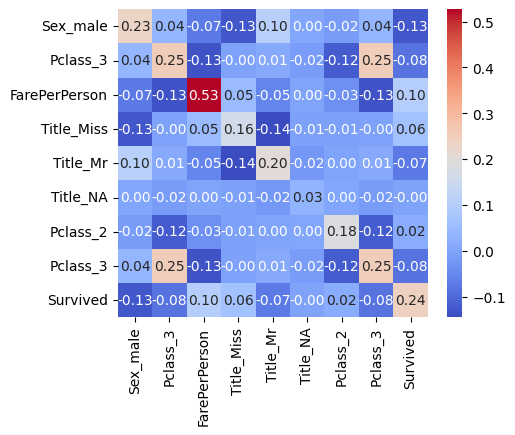

In [1571]:
# Print covariance matrix
plt.figure(figsize=(5, 4))
sns.heatmap(X_copy.cov(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [1572]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [1573]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8

In [1574]:
y_preds = rf.predict(X_test)

In [1575]:
df_preds = pd.DataFrame()
df_preds['Actual'] = y_test
df_preds['Predicted'] = y_preds

In [1576]:
df_preds[df_preds['Actual'] != df_preds['Predicted']]

,Actual,Predicted
100,0,1
816,0,1
690,1,0
71,0,1
852,0,1
737,1,0
147,0,1
559,1,0
262,0,1
436,0,1


In [1577]:
data_cleaned.loc[df_preds[df_preds['Actual'] != df_preds['Predicted']].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S


In [1578]:
def create_submission(model, test_data):
    result = model.predict(create_features(test_data))

    prediction = {}

    prediction["PassengerId"] = []
    prediction["Survived"] = []

    for item in zip(test_data["PassengerId"].to_list(), result):
        prediction["PassengerId"].append(item[0])
        prediction["Survived"].append(int(item[1]))

    import csv

    with open('submission.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(prediction.keys())
        for row in zip(*prediction.values()):
            writer.writerow(row)

In [1579]:
xgb = RandomForestClassifier(random_state=42,
                             n_estimators=500,
                             max_depth=10,
                             min_samples_split=5,
                             min_samples_leaf=2,
                             max_features='sqrt',
                             bootstrap=True
                             )
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8

In [1580]:
create_submission(xgb, test_data)

In [1581]:
# Plot age vs survival
data['Age'].unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1582]:
X_train

,Sex_male,Pclass_3,FarePerPerson,Title_Miss,Title_Mr,Title_NA,Pclass_2,Pclass_3
37,True,True,-0.503850,False,True,False,False,True
58,False,False,-0.032830,True,False,False,True,False
57,True,True,-0.519371,False,True,False,False,True
94,True,True,-0.518978,False,True,False,False,True
209,True,False,-0.069864,False,True,False,False,False
...,...,...,...,...,...,...,...,...
92,True,False,0.250374,False,True,False,False,False
134,True,False,-0.410245,False,True,False,True,False
337,False,False,1.887329,True,False,False,False,False
548,True,True,-0.089316,False,True,False,False,True


In [1583]:
# Use CatBoostClassifier
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=1500, learning_rate=0.01, depth=10, random_seed=42)
cbc.fit(X_train, y_train)
cbc.score(X_test, y_test)


CatBoostError: catboost/libs/data/features_layout.cpp:124: All feature names should be different, but 'Pclass_3' used more than once.

In [1466]:
create_submission(cbc, test_data)